## Imports

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Read Data

In [50]:
df = pd.read_csv('health_care.csv')

## initial Exploring Data

In [52]:
df.head()

,patient_name,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,gender,bmi,smoker,...,kidney_function,mental_health_score,infection_risk,diagnosis,treatment_outcome,treatment_start,treatment_end,adherence_level,hospital_stay_days,medication
0,Fatma Hassan,54,140.0,166.0,0,74,36.7,Female,31.2,0,...,75,1,Low,Liver Disease,failure,5/22/2023,7/2/2023,Medium,8,NaN
1,Hana Mostafa,84,116.0,234.0,0,88,38.0,Female,31.5,0,...,69,10,High,Healthy,improvement,5/22/2023,7/2/2023,Medium,2,No Drug
2,Fatma Hassan,74,147.0,265.0,0,76,37.7,Female,32.1,0,...,89,6,Medium,Kidney Disease,failure,9/20/2023,12/20/2024,Medium,22,Lisinopril
3,Yassin Mahmoud,80,125.0,262.0,0,90,36.2,Female,31.9,1,...,85,1,Low,Heart Disease,failure,3/24/2024,4/2/2024,Low,28,Lisinopril
4,Laila Hassan,74,133.0,153.0,0,84,37.3,Male,37.5,0,...,72,3,Low,Liver Disease,failure,12/6/2024,3/13/2025,Medium,29,Statins


In [53]:
df.describe()

,age,blood_pressure,cholesterol,diabetes,heart_rate,temperature,bmi,smoker,exercise_per_week,hospital_visits,blood_sugar,liver_function,kidney_function,mental_health_score,hospital_stay_days
count,5000.000000,4750.000000,4650.000000,5000.000000,5000.000000,5000.00000,4700.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,54.828200,129.740421,209.394194,0.206400,79.403400,37.26418,28.012128,0.302600,3.12980,4.623800,129.848020,49.247760,74.153800,5.088400,12.234000
std,20.376264,15.078059,29.164240,0.404761,9.660255,0.72445,5.107462,0.459429,2.13529,3.266926,31.730374,21.675851,19.630232,2.425647,9.350355
min,20.000000,90.000000,150.000000,0.000000,60.000000,36.00000,18.500000,0.000000,0.00000,0.000000,80.000000,10.000000,30.000000,1.000000,0.000000
25%,37.000000,119.000000,188.000000,0.000000,73.000000,36.60000,24.300000,0.000000,1.00000,2.000000,104.450000,32.000000,60.000000,3.000000,4.000000
50%,54.000000,130.000000,209.000000,0.000000,79.000000,37.30000,27.900000,0.000000,3.00000,4.000000,124.700000,49.250000,74.000000,5.000000,10.000000
75%,73.000000,140.000000,230.000000,0.000000,86.000000,37.90000,31.500000,1.000000,5.00000,8.000000,152.325000,66.900000,88.000000,7.000000,20.000000
max,90.000000,180.000000,300.000000,1.000000,117.000000,38.50000,40.000000,1.000000,7.00000,10.000000,199.800000,100.000000,120.000000,10.000000,30.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_name         5000 non-null   object 
 1   age                  5000 non-null   int64  
 2   blood_pressure       4750 non-null   float64
 3   cholesterol          4650 non-null   float64
 4   diabetes             5000 non-null   int64  
 5   heart_rate           5000 non-null   int64  
 6   temperature          5000 non-null   float64
 7   gender               5000 non-null   object 
 8   bmi                  4700 non-null   float64
 9   smoker               5000 non-null   int64  
 10  exercise_per_week    5000 non-null   int64  
 11  alcohol_intake       2521 non-null   object 
 12  hospital_visits      5000 non-null   int64  
 13  blood_sugar          5000 non-null   float64
 14  liver_function       5000 non-null   float64
 15  kidney_function      5000 non-null   i

In [55]:
df.columns

Index(['patient_name', 'age', 'blood_pressure', 'cholesterol', 'diabetes',
       'heart_rate', 'temperature', 'gender', 'bmi', 'smoker',
       'exercise_per_week', 'alcohol_intake', 'hospital_visits', 'blood_sugar',
       'liver_function', 'kidney_function', 'mental_health_score',
       'infection_risk', 'diagnosis', 'treatment_outcome', 'treatment_start',
       'treatment_end', 'adherence_level', 'hospital_stay_days', 'medication'],
      dtype='object')

In [56]:
string_cols = df.select_dtypes(include=['object', 'string']).columns
cols = string_cols.difference(['patient_name', 'treatment_start', 'treatment_end'])

for col in cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'adherence_level':
['Medium' 'Low' 'High']

Unique values in 'alcohol_intake':
[nan 'Low' 'High' 'Moderate']

Unique values in 'diagnosis':
['Liver Disease' 'Healthy' 'Kidney Disease' 'Heart Disease' 'Diabetes'
 'Hypertension']

Unique values in 'gender':
['Female' 'Male']

Unique values in 'infection_risk':
['Low' 'High' 'Medium']

Unique values in 'medication':
[nan 'No Drug' 'Lisinopril' 'Statins' 'Metformin' 'Beta Blockers']

Unique values in 'treatment_outcome':
['failure' 'improvement' 'recovered']


In [57]:
df.duplicated().sum()

0

In [58]:
df.isnull().sum()

patient_name              0
age                       0
blood_pressure          250
cholesterol             350
diabetes                  0
heart_rate                0
temperature               0
gender                    0
bmi                     300
smoker                    0
exercise_per_week         0
alcohol_intake         2479
hospital_visits           0
blood_sugar               0
liver_function            0
kidney_function           0
mental_health_score       0
infection_risk            0
diagnosis                 0
treatment_outcome         0
treatment_start         150
treatment_end             0
adherence_level           0
hospital_stay_days        0
medication              401
dtype: int64

## Data Handling

In [60]:
# to calc. duration of treatment
df["treatment_start"] = pd.to_datetime(df["treatment_start"], errors="coerce")
df["treatment_end"] = pd.to_datetime(df["treatment_end"], errors="coerce")

# drop rows have null values in treatment_start col
df = df.dropna(subset=['treatment_start'])

df['treatment_duration'] = (df['treatment_end'] - df['treatment_start']).dt.days

# delete treatment_end , treatment_start columns , patient_name
df = df.drop(columns=['treatment_start', 'treatment_end' , 'patient_name'])

In [61]:
print(len(df.groupby(['age', 'bmi', 'gender'])))
print(len(df.groupby(["gender", "age", "bmi"])))
print(len(df.groupby(["gender", "age", "exercise_per_week"])))

4254
4254
1101


In [62]:
# binning as no. groups are large 
df['age_bin'] = pd.cut(df['age'], bins=[0, 30, 45, 60, 80, 100], labels=['young', 'mid1', 'mid2', 'old', 'very_old'])

# fillna in bmi column
df["bmi"] = df.groupby(["gender", "age_bin", "exercise_per_week"])["bmi"].transform(lambda x: x.fillna(x.median()))

# binning as no. groups are large 
df['bmi_bin'] = pd.cut(df['bmi'], bins=[0, 18.5, 25, 30, 35, 100], labels=['underweight', 'normal', 'overweight', 'obese', 'morbid'])

# fillna in blood pressure column
df['blood_pressure'] = df.groupby(['age_bin', 'bmi_bin', 'gender'])['blood_pressure'].transform(lambda x: x.fillna(x.mean()))

# fillna in cholesterol column
df["cholesterol"] = df.groupby(["gender", "age_bin", "bmi_bin"])["cholesterol"].transform(lambda x: x.fillna(x.median()))

# fillna in alcohol_intake column
df["alcohol_intake"] = df["alcohol_intake"].fillna(df["alcohol_intake"].mode()[0])

#df = df.drop(columns = ['adherence_level'])

C:\Users\User\AppData\Local\Temp\ipykernel_15752\1317723026.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_15752\1317723026.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\User\AppData\Local\Temp\ipykernel_15752\1317723026.py:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [63]:
for val in df['diagnosis'].unique():
    print(f"{val} :\n {df[df['diagnosis'] == val]['medication'].value_counts()}")

Liver Disease :
 medication
Statins          501
No Drug           23
Lisinopril        18
Metformin         12
Beta Blockers      1
Name: count, dtype: int64
Healthy :
 medication
No Drug          1448
Lisinopril         52
Metformin          32
Statins            21
Beta Blockers       2
Name: count, dtype: int64
Kidney Disease :
 medication
Lisinopril       665
No Drug           24
Statins           10
Metformin          3
Beta Blockers      2
Name: count, dtype: int64
Heart Disease :
 medication
Beta Blockers    63
Lisinopril        3
No Drug           3
Metformin         2
Statins           1
Name: count, dtype: int64
Diabetes :
 medication
Metformin     857
Lisinopril     29
No Drug        27
Statins        10
Name: count, dtype: int64
Hypertension :
 medication
Lisinopril    605
No Drug        19
Metformin      12
Statins        12
Name: count, dtype: int64


In [64]:
df['medication'].unique()

array([nan, 'No Drug', 'Lisinopril', 'Statins', 'Metformin',
       'Beta Blockers'], dtype=object)

In [65]:
df.loc[df['medication'] == 'unknown', 'medication'] = np.nan

In [66]:
# fillna in medication column
df['medication'] = df['medication'].fillna(df.groupby('diagnosis')['medication'].transform(lambda x:x.mode()[0]))

In [67]:
df.isnull().sum()

age                    0
blood_pressure         0
cholesterol            0
diabetes               0
heart_rate             0
temperature            0
gender                 0
bmi                    0
smoker                 0
exercise_per_week      0
alcohol_intake         0
hospital_visits        0
blood_sugar            0
liver_function         0
kidney_function        0
mental_health_score    0
infection_risk         0
diagnosis              0
treatment_outcome      0
adherence_level        0
hospital_stay_days     0
medication             0
treatment_duration     0
age_bin                0
bmi_bin                0
dtype: int64

In [68]:
binary_cols = ['smoker', 'diabetes'] 

df[binary_cols] = df[binary_cols].replace({0: 'No', 1: 'Yes'})

In [69]:
for col in binary_cols:
    print(df[col].unique())

['No' 'Yes']
['No' 'Yes']


## Boxplots for outliers

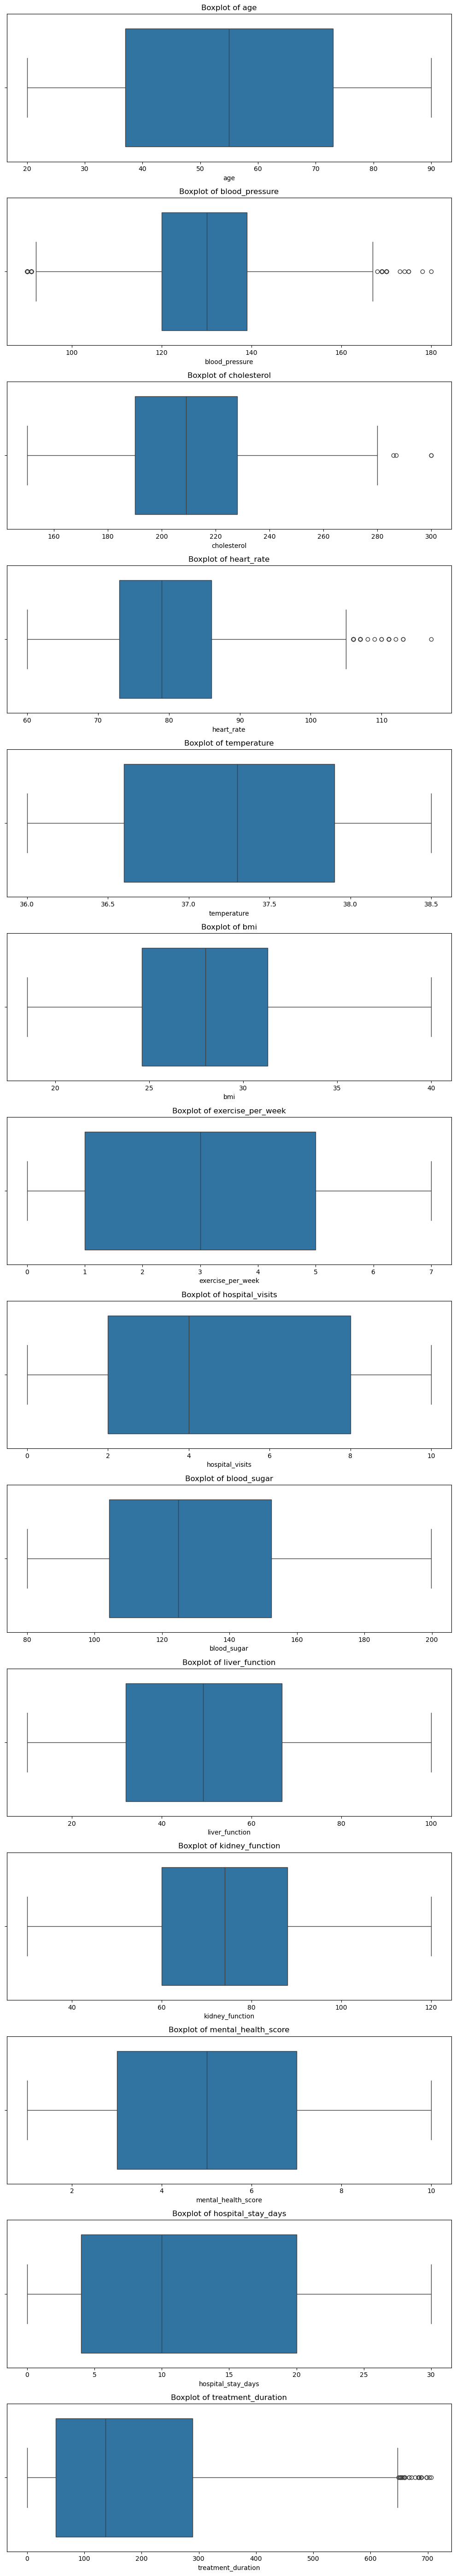

In [71]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
plt.figure(figsize=(10, len(numeric_cols)*4))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols), 1, i+1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Visualize distributions

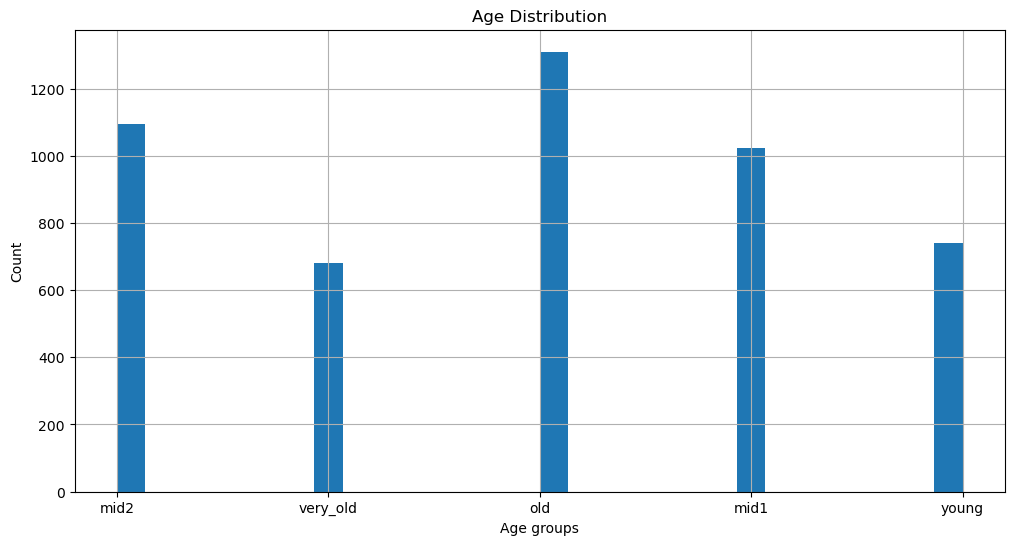

In [73]:
plt.figure(figsize=(12, 6))
df['age_bin'].hist(bins=30)
plt.title('Age Distribution')
plt.xlabel('Age groups')
plt.ylabel('Count')
plt.show()

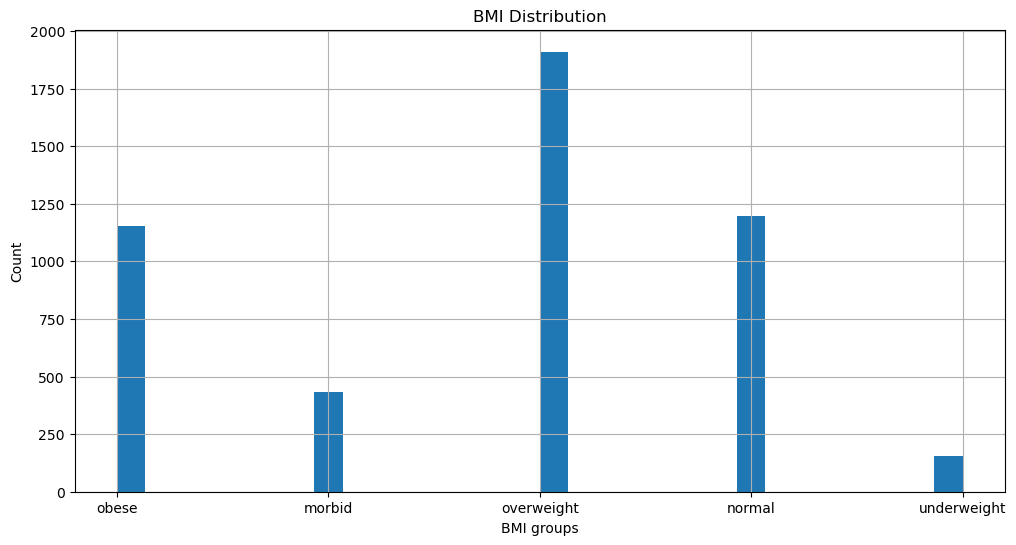

In [74]:
plt.figure(figsize=(12, 6))
df['bmi_bin'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI groups')
plt.ylabel('Count')
plt.show()

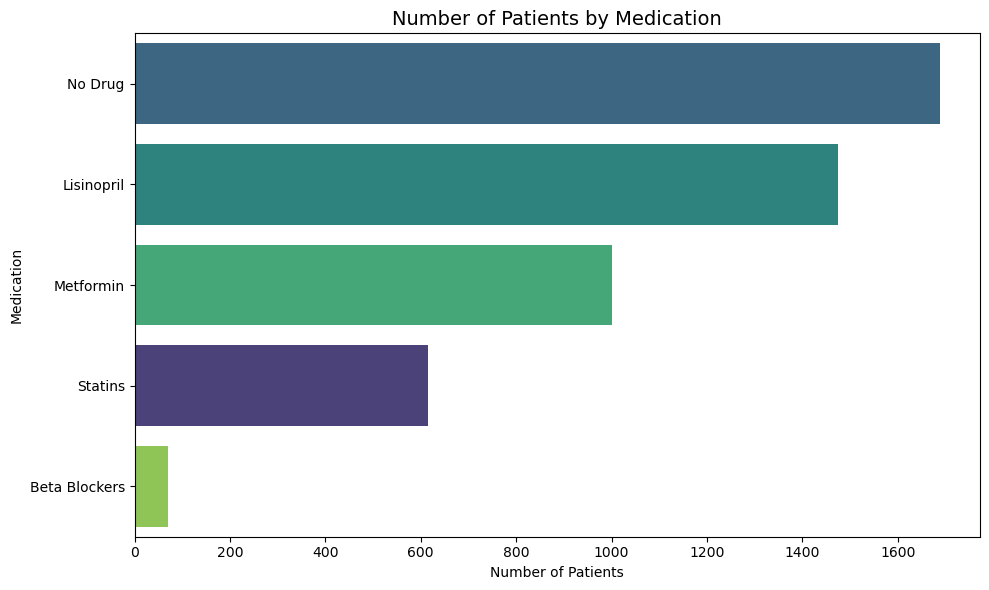

In [75]:
plt.figure(figsize=(10, 6))
sns.countplot(
    y='medication',
    hue='medication',
    data=df,
    order=df['medication'].value_counts().index,
    palette='viridis',
    legend=False
)
plt.title('Number of Patients by Medication', fontsize=14)
plt.xlabel('Number of Patients')
plt.ylabel('Medication')
plt.tight_layout()
plt.show()


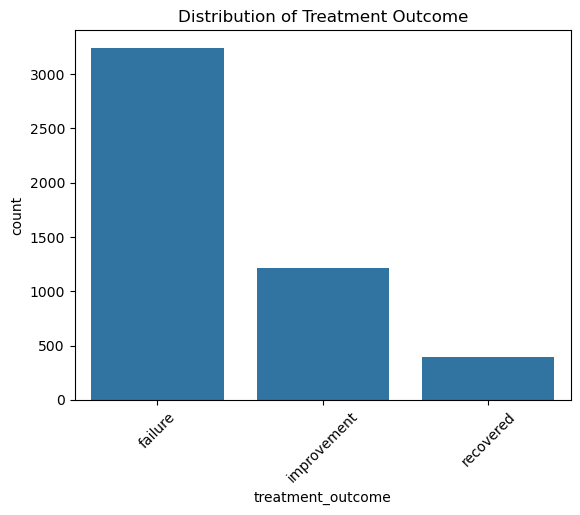

In [76]:
#حالة الناس الخارجة من المستشفي
sns.countplot(x='treatment_outcome', data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Treatment Outcome")
plt.show()


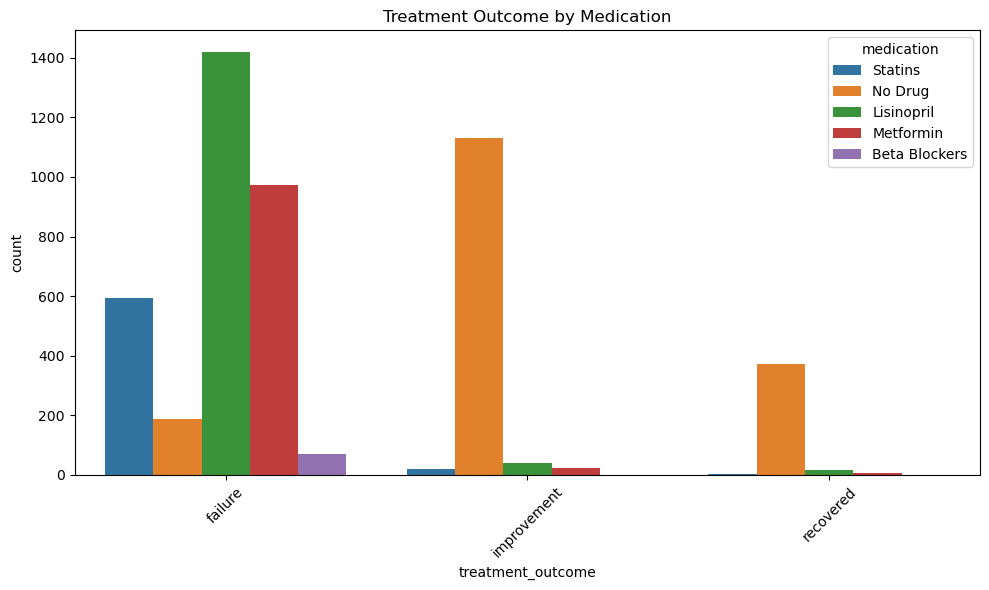

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='treatment_outcome', hue='medication')
plt.title("Treatment Outcome by Medication")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Heatmap for correlations

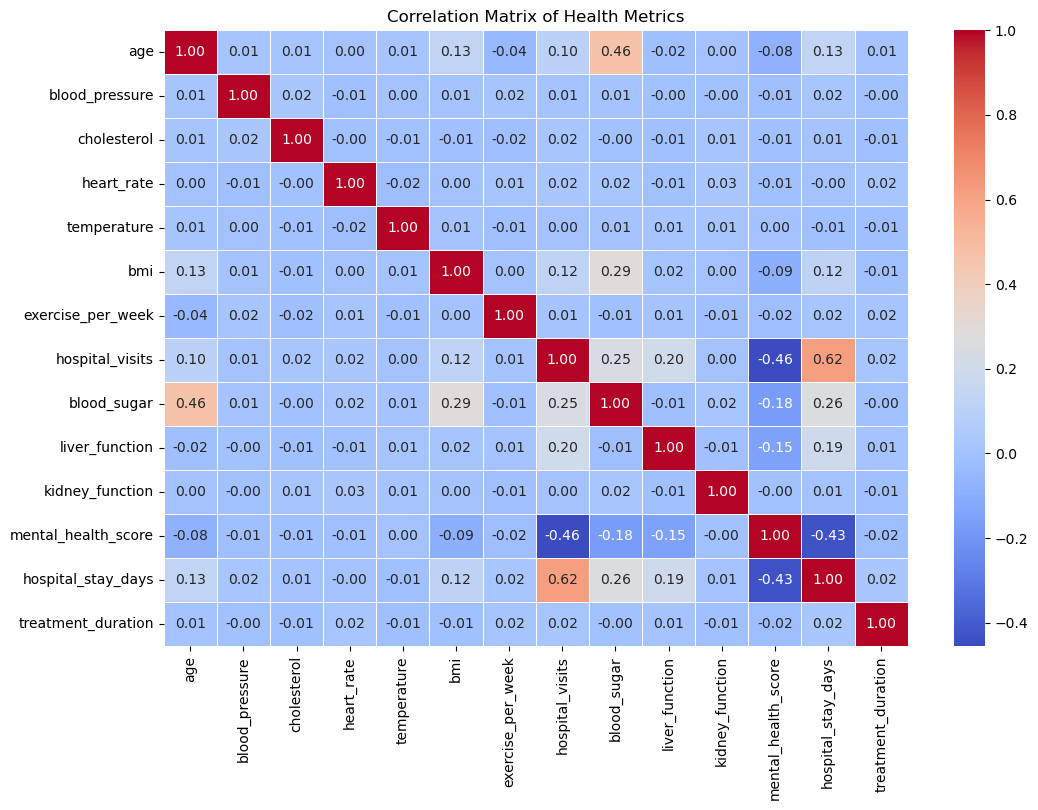

In [79]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    df.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
)
plt.title("Correlation Matrix of Health Metrics")
plt.show()
#من الصورة تحت 
#في ترابط بين عمود blood_sugar& diabetes بمعامل 0.8
#hospital_visits & hospital_stay_days معامل 0.62
# age & blood_sugar  0.46
# haspital_visits & mental_health_score -0.46
#mental_health_score & hospital_stay_days -0.43

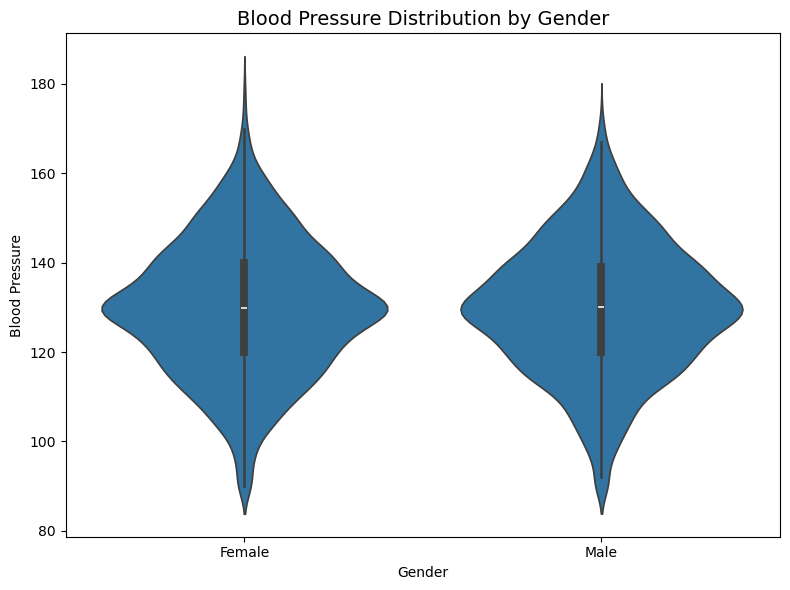

In [80]:

plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='blood_pressure', data=df)
plt.title("Blood Pressure Distribution by Gender", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Blood Pressure")
plt.tight_layout()
plt.show()


In [81]:
fig = px.scatter(df, y="age_bin", x="bmi", color="treatment_outcome",
                 hover_data=["diagnosis"], title="Age vs BMI vs Treatment Outcome")
fig.show()

In [82]:
import plotly.express as px
import pandas as pd

age_avg_visits = df.groupby("age")["hospital_visits"].mean().reset_index()

fig = px.line(age_avg_visits, x="age", y="hospital_visits", markers=True,
              title="Average Hospital Visits by Age")
fig.show()


In [83]:
fig = px.box(df, x="diagnosis", y="mental_health_score", color="diagnosis",
             title="Mental Health Score by Diagnosis")
fig.show()

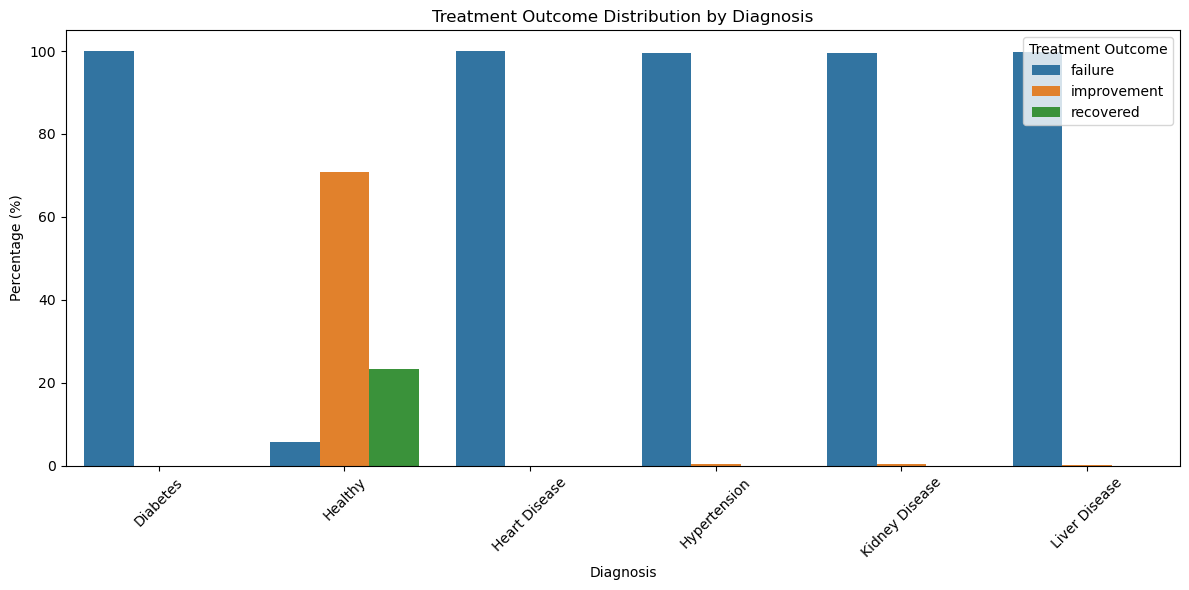

In [84]:
recovery_rate = (
    df.groupby('diagnosis')['treatment_outcome']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)
recovery_rate['percentage'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(
    data=recovery_rate,
    x='diagnosis',
    y='percentage',
    hue='treatment_outcome'
)

plt.title('Treatment Outcome Distribution by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Treatment Outcome')
plt.tight_layout()
plt.show()


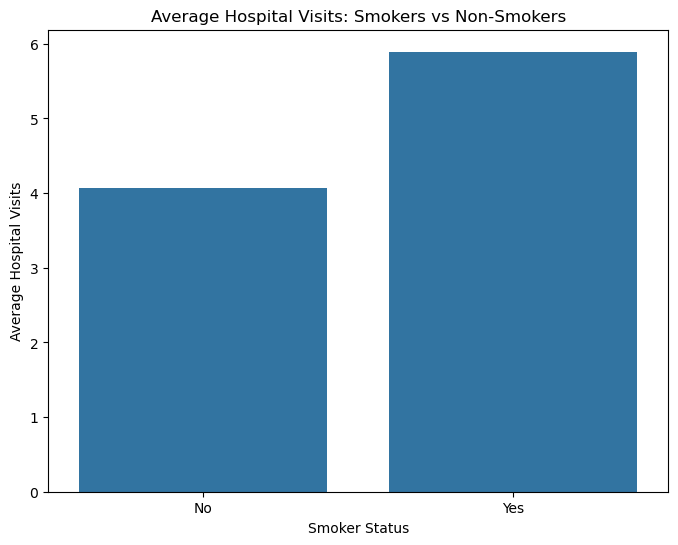

In [85]:
smoking_visits = df.groupby('smoker')['hospital_visits'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_visits.index, y=smoking_visits)
plt.title('Average Hospital Visits: Smokers vs Non-Smokers')
plt.xlabel('Smoker Status')
plt.ylabel('Average Hospital Visits')
plt.show()

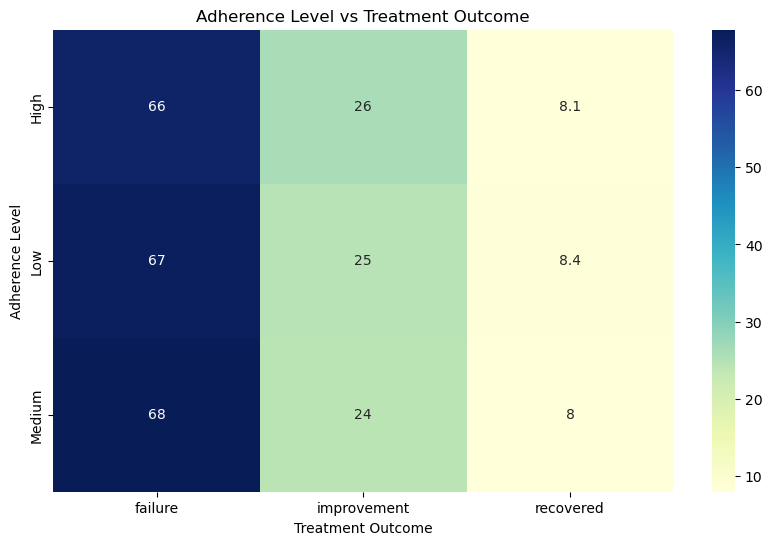

In [86]:
adherence_outcome = pd.crosstab(df['adherence_level'], df['treatment_outcome'], normalize='index') * 100

plt.figure(figsize=(10, 6))
sns.heatmap(adherence_outcome, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Adherence Level vs Treatment Outcome')
plt.xlabel('Treatment Outcome')
plt.ylabel('Adherence Level')
plt.show()

## Standardize numerical features

In [88]:
df_standard = df.copy()
numeric_cols = df_standard.select_dtypes(include='number').columns
scaler = StandardScaler()
df_standard[numeric_cols] = scaler.fit_transform(df_standard[numeric_cols])

## Encode categorical features

In [90]:
encoders = dict()
df_encoded = df_standard.copy()
for col in df_encoded.select_dtypes("object").columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le  

for col, le in encoders.items():
    print(f"Label encoding for '{col}':")
    for i, cls in enumerate(le.classes_):
        print(f"  {cls} => {i}")
    print("-" * 30)

Label encoding for 'diabetes':
  No => 0
  Yes => 1
------------------------------
Label encoding for 'gender':
  Female => 0
  Male => 1
------------------------------
Label encoding for 'smoker':
  No => 0
  Yes => 1
------------------------------
Label encoding for 'alcohol_intake':
  High => 0
  Low => 1
  Moderate => 2
------------------------------
Label encoding for 'infection_risk':
  High => 0
  Low => 1
  Medium => 2
------------------------------
Label encoding for 'diagnosis':
  Diabetes => 0
  Healthy => 1
  Heart Disease => 2
  Hypertension => 3
  Kidney Disease => 4
  Liver Disease => 5
------------------------------
Label encoding for 'treatment_outcome':
  failure => 0
  improvement => 1
  recovered => 2
------------------------------
Label encoding for 'adherence_level':
  High => 0
  Low => 1
  Medium => 2
------------------------------
Label encoding for 'medication':
  Beta Blockers => 0
  Lisinopril => 1
  Metformin => 2
  No Drug => 3
  Statins => 4
-------------

In [91]:
cols = ['mental_health_score','medication','exercise_per_week','age','bmi','liver_function',
        'blood_sugar','smoker','diabetes','diagnosis','hospital_stay_days','hospital_visits', 'treatment_outcome']

for col in cols:
    unique_vals = df_encoded[col].unique()
    if len(unique_vals) < 7:
        print(f"\nColumn: {col}")
        
        if col in encoders:
            le = encoders[col]
            for i, cls in enumerate(le.classes_):
                print(f"  {cls} => {i}")
        else:
            print("No label encoding applied.")
        




Column: medication
  Beta Blockers => 0
  Lisinopril => 1
  Metformin => 2
  No Drug => 3
  Statins => 4

Column: smoker
  No => 0
  Yes => 1

Column: diabetes
  No => 0
  Yes => 1

Column: diagnosis
  Diabetes => 0
  Healthy => 1
  Heart Disease => 2
  Hypertension => 3
  Kidney Disease => 4
  Liver Disease => 5

Column: treatment_outcome
  failure => 0
  improvement => 1
  recovered => 2


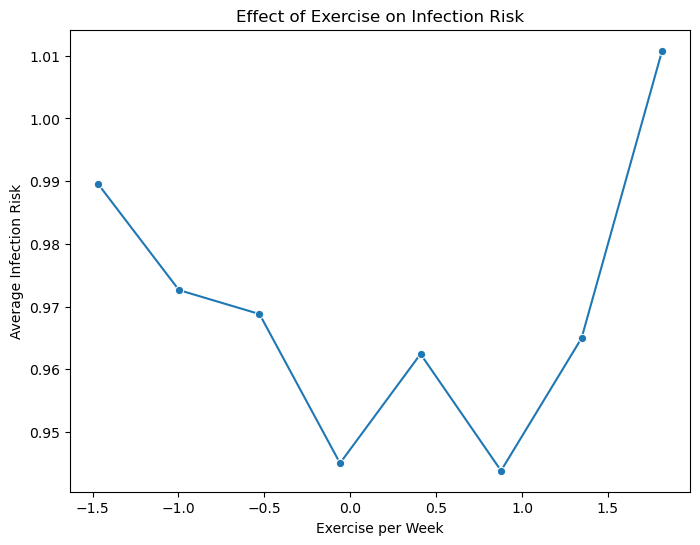

In [92]:
exercise_risk = df_encoded.groupby('exercise_per_week')['infection_risk'].mean()

plt.figure(figsize=(8, 6))
sns.lineplot(x=exercise_risk.index, y=exercise_risk.values, marker='o')
plt.title('Effect of Exercise on Infection Risk')
plt.xlabel('Exercise per Week')
plt.ylabel('Average Infection Risk')
plt.show()

## Prediction

In [94]:
# Split the data into features and target variable
x = df_encoded.drop(columns=['treatment_outcome','age_bin','bmi_bin'])
y = df_encoded['treatment_outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size = 0.8 , random_state = 42 , stratify = y)

In [95]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = model.predict(X_test)

In [97]:
accuracy_score(y_test , y_pred) 

0.9608247422680413

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       648
           1       0.90      0.95      0.92       243
           2       0.88      0.77      0.82        79

    accuracy                           0.96       970
   macro avg       0.93      0.90      0.91       970
weighted avg       0.96      0.96      0.96       970



### DecisionTreeClassifier

In [100]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)

The training accuracy is 1.0
The test accuracy is 0.9979381443298969


In [102]:
x.columns

Index(['age', 'blood_pressure', 'cholesterol', 'diabetes', 'heart_rate',
       'temperature', 'gender', 'bmi', 'smoker', 'exercise_per_week',
       'alcohol_intake', 'hospital_visits', 'blood_sugar', 'liver_function',
       'kidney_function', 'mental_health_score', 'infection_risk', 'diagnosis',
       'adherence_level', 'hospital_stay_days', 'medication',
       'treatment_duration'],
      dtype='object')

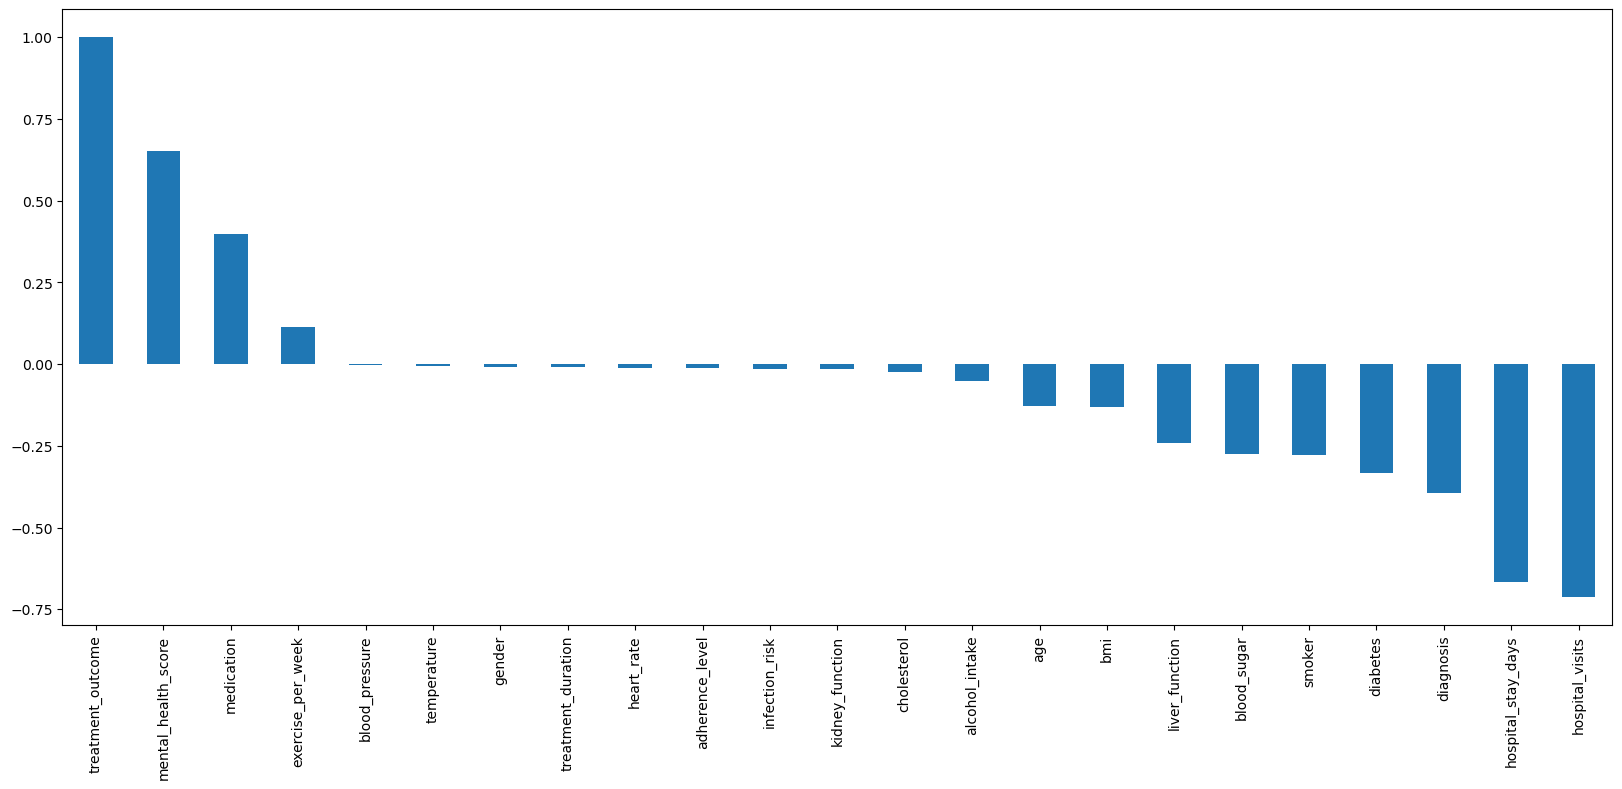

In [103]:
plt.figure(figsize=(20,8))
df_encoded.drop(columns=['age_bin','bmi_bin']).corr()['treatment_outcome'].sort_values(ascending = False).plot(kind='bar')
plt.show()

In [208]:
x = df_encoded[['mental_health_score','exercise_per_week','age','bmi','liver_function','blood_sugar','hospital_stay_days','hospital_visits','medication','smoker','diabetes','diagnosis']]
y = df_encoded['treatment_outcome']

In [210]:
X_train, X_test, y_train, y_test = train_test_split(x, y , train_size = 0.8 , random_state = 42 , stratify = y)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Making predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate the accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('The training accuracy is', train_accuracy)
print('The test accuracy is', test_accuracy)


The training accuracy is 1.0
The test accuracy is 0.9979381443298969


In [302]:
import joblib
from sklearn.preprocessing import StandardScaler


df_standard = df[['mental_health_score', 'exercise_per_week', 'age', 'bmi',
    'liver_function', 'blood_sugar', 'hospital_stay_days', 'hospital_visits']]

df_standard = df_standard.astype('float64')

scaler = StandardScaler()
df_standard.loc[:, df_standard.columns] = scaler.fit_transform(df_standard)


joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']